<a href="https://colab.research.google.com/github/heritonarantes/heritonarantes/blob/main/An%C3%A1lise_dos_dados_do_AirBnB_RJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Análise dos Dados do Airbnb - Rio de Janeiro**

Neste *notebook*, iremos analisar os dados referentes à cidade do Rio de Janeiro, e ver quais insights podem ser extraídos a partir de dados brutos.

**Fonte de dados:** [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

**Arquivo baixado**: * `listings.csv` - *Summary information and metrics for listings in Rio de Janeiro (good for visualisations).* 

**Data do arquivo:** 17/07/2021

##Importando os dados 

In [3]:
# Primeiro projeto do curso DSNP 3.0
# O projeto consiste em analisar os dados do AirBnB da cidade do RJ/RJ. O banco de dados é disponibilizado pelo próprio AirBnB.

# Primeiro passo é importar as bibliotecas que vamos utilizar.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


##Análisando os dados importados
Aqui é demonstrado o que significa as variáveis do conjunto de dados.

In [4]:
# agora vamos importar o banco de dados do próprio AirBnB
df = pd.read_csv("http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2021-07-17/visualisations/listings.csv")

 Dicionário das variáveis 

* id - número de id gerado para identificar o imóvel
* name - nome da propriedade anunciada
* host_id - número de id do proprietário (anfitrião) da propriedade
* host_name - Nome do anfitrião
* neighbourhood_group - esta coluna não contém nenhum valor válido
* neighbourhood - nome do bairro
* latitude - coordenada da latitude da propriedade
* longitude - coordenada da longitude da propriedade
* room_type - informa o tipo de quarto que é oferecido
* price - preço para alugar o imóvel
* minimum_nights - quantidade mínima de noites para reservar
* number_of_reviews - número de reviews que a propriedade possui
* last_review - data do último review
* reviews_per_month - quantidade de reviews por mês
* calculated_host_listings_count - quantidade de imóveis do mesmo anfitrião
* availability_365 - número de dias de disponibilidade dentro de 365 dias




In [5]:
#Vamos mostrar o conteúdo das 5 primeiras linhas para entender melhor o que estamos importando. 
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",68997,Matthias,NaN,Copacabana,-22.96599,-43.17940,Entire home/apt,170,5,265,2021-05-21,2.11,1,317
1,24480,Nice and cozy near Ipanema Beach,99249,Goya,NaN,Ipanema,-22.98405,-43.20189,Entire home/apt,283,3,85,2017-04-22,0.88,1,154
2,25026,Beautiful Modern Decorated Studio in Copa,102840,Viviane,NaN,Copacabana,-22.97735,-43.19105,Entire home/apt,160,7,238,2019-04-27,1.89,2,316
3,35636,Cosy flat close to Ipanema beach,153232,Patricia,NaN,Ipanema,-22.98839,-43.19232,Entire home/apt,256,2,181,2019-12-06,1.97,1,167
4,35764,COPACABANA SEA BREEZE - RIO - 20 X Superhost,153691,Patricia Miranda & Paulo,NaN,Copacabana,-22.98107,-43.19136,Entire home/apt,120,3,363,2019-06-15,3.05,1,92


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Nesta etapa, precisamos identificar a quantidade de entradas e quais os tipos de dados nas colunas.

O arquivo que baixamos é apenas um resumo fornecido pelo Airbnb. Existe um arquivo com mais variáveis, mas para fins de estudo, este é suficiente.

In [6]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 23635
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes. 
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em 37% das linhas.
* As variáveis `name` e `host_name` têm aproximadamente 0,8% e 0,2% dos valores nulos.
* As outras variáveis não apresentam valores zerados/nulos.

In [7]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.366194
last_review                       0.366194
name                              0.000889
host_name                         0.000296
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para demonstrar as distribuições das variáveis, optamos por plotar em histograma. 

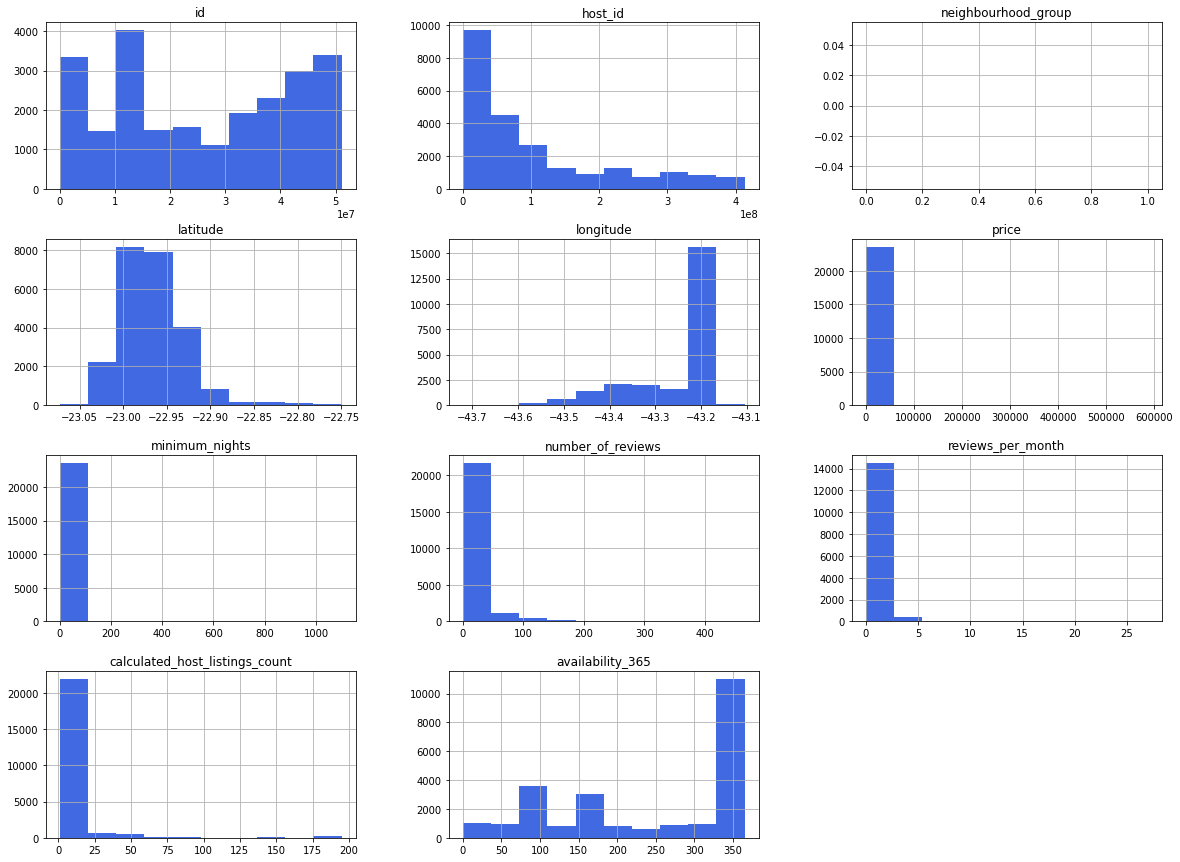

In [8]:
# plotar o histograma das variáveis numéricas
df.hist(bins=10, figsize=(20,15), color= 'royalblue');

### **Q4. Há *outliers* presentes?**
Pela distribuição do histograma, é possível verificar indícios da presença de outliers. 

* price 
* minimum_nights 
* number_of_reviews
* reviews_per_month
* calculated_host_listings_count
* availability_365


Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Duas maneiras rápidas que auxiliam a detecção de outliers:

* Resumo estatístico por meio do método describe()
* Plotar boxplots para a variável.

In [9]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,23635.000000,23635.000000,23635.000000,14980.000000,23635.000000,23635.000000
mean,751.329300,4.919018,13.207489,0.602536,7.396361,246.030379
std,5477.207312,20.702676,31.962546,0.864291,22.759622,123.474424
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,150.000000,1.000000,0.000000,0.090000,1.000000,130.000000
50%,256.000000,2.000000,2.000000,0.240000,1.000000,297.000000
75%,511.000000,4.000000,10.000000,0.790000,3.000000,364.000000
max,586229.000000,1100.000000,466.000000,26.960000,195.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 511, porém seu valor máximo é 5826.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano.

#### Boxplot para minimum_nights# 

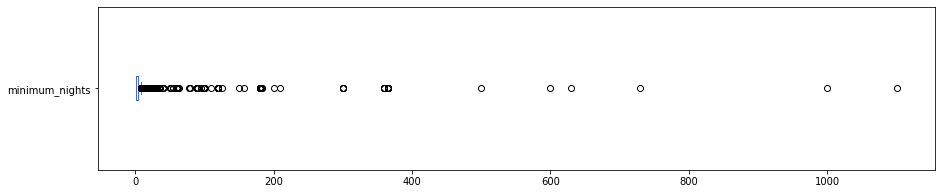

minimum_nights: valores acima de 30:
202 entradas
0.8547%


In [10]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3), color= 'royalblue')
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### Boxplot para price

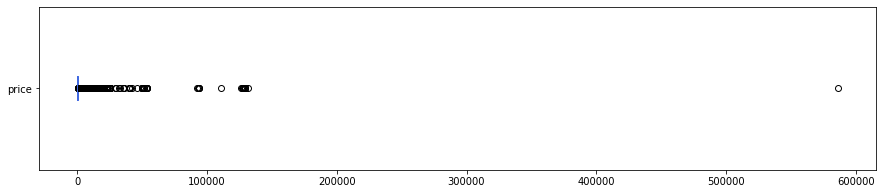


price: valores acima de 1500
1563 entradas
6.6131%


In [11]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),color= 'royalblue')
plt.show()

# ver quantidade de valores acima de 1500 para price
print("\nprice: valores acima de 1500")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

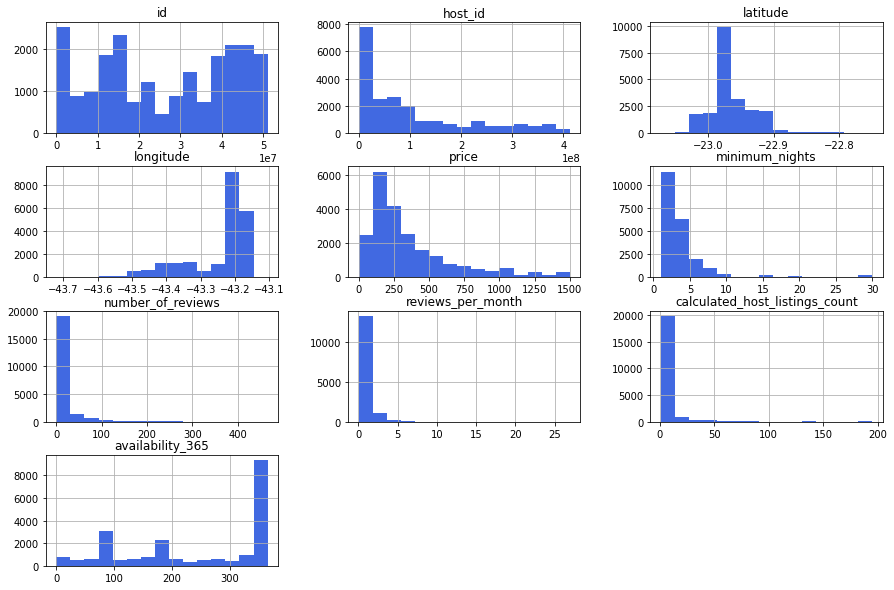

In [12]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10), color = ("royalblue"));

### **Q4. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [13]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.133954,-0.160485,-0.158233,0.079018,0.129440
minimum_nights,0.133954,1.000000,-0.068339,-0.094496,-0.049724,0.011511
number_of_reviews,-0.160485,-0.068339,1.000000,0.637832,-0.052175,-0.139900
reviews_per_month,-0.158233,-0.094496,0.637832,1.000000,-0.001266,-0.190763
calculated_host_listings_count,0.079018,-0.049724,-0.052175,-0.001266,1.000000,0.016037
availability_365,0.129440,0.011511,-0.139900,-0.190763,0.016037,1.000000


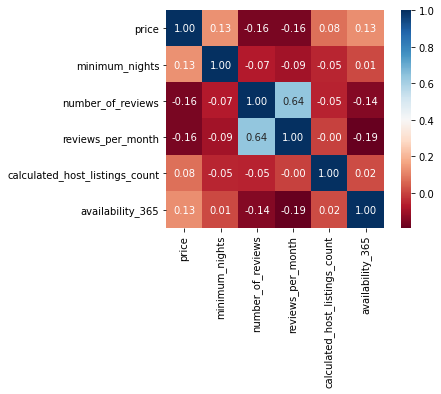

In [14]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [15]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    15593
Private room        5697
Shared room          516
Hotel room            83
Name: room_type, dtype: int64

In [16]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.712367
Private room       0.260268
Shared room        0.023573
Hotel room         0.003792
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do Rio?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.

In [17]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:20]

neighbourhood
Caju                  1208.000000
Anchieta               800.000000
Vaz Lobo               789.500000
Realengo               711.500000
Pavuna                 590.666667
Sepetiba               556.500000
Rocha Miranda          551.000000
Joá                    524.864865
Complexo do Alemão     520.000000
Lagoa                  507.689840
Paciência              507.250000
Manguinhos             500.000000
Pechincha              499.696970
Alto da Boa Vista      484.818182
Gardênia Azul          484.095238
Leblon                 482.848825
Osvaldo Cruz           481.666667
Higienópolis           474.500000
São Conrado            473.958621
Freguesia (Ilha)       467.666667
Name: price, dtype: float64

A localidade mais cara foi o bairro do Caju, e a mais barata, numa lista de 20, foi a Freguesia.

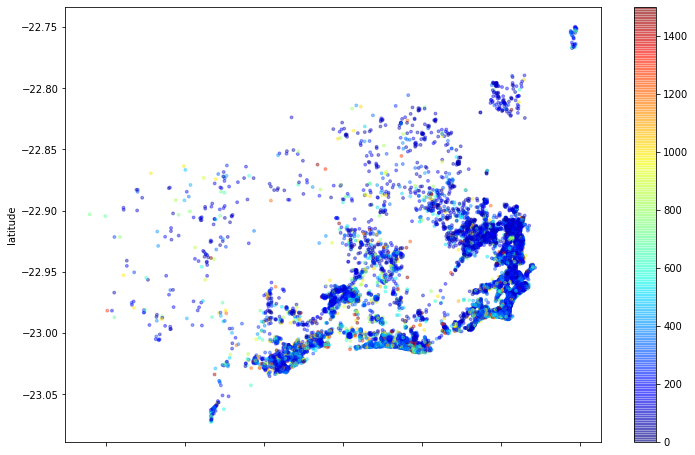

In [18]:
df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
        cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel ?**


In [19]:

# ver a média da coluna `minimum_nights`

df_clean['minimum_nights'].mean()

3.5255607839554113

Pelos dados apresentados, a média de mínimo de noites é de 3.5, sendo que a é media de noites nas rede hoteleiras é de 3 dias. Para concorrer com a rede hoteleira, seria interessante oferecer a opção de menos dias para a reserva minima, maximizando assim a rentabilidade. 

Fonte: [Data Rio](https://www.data.rio/documents/9tempo-m%C3%A9dio-de-perman%C3%AAncia-dos-h%C3%B3spedes-em-n%C3%BAmero-inteiro-de-dias-por-categoria-da-unidade-de-hospedagem-uh-segundo-o-per%C3%ADodo-no-munic%C3%ADpio-do-rio-de-janeiro-entre-2009-2017/about).

## Conclusões

Foi feita apenas uma análise superficial na base de dados do Airbnb,apebas para fins de estudo, porém já se percebeu que existem *outliers* em algumas das variáveis. Seria necessário uma analise mais detalhada nesses outliers, e comparar com outras variáveis.

Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos. Um ponto a ser feito, seria entender o motivo de não ter imóveis disponíveis. Alguns questioamentos: Zonas de violência ? Mata ? Difícil acesso ? 

Caso opte por concorrer com a rede hoteleira, seria interessante oferecer a possiblidade de reservar menos de 3 noites.

Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos.
